In [5]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
import json

In [6]:
class_names = ['normal', 'crack']

classes = {'normal': 0, 
            'crack': 1}

In [7]:
root_path = '/home/inchanji/nia23soc/eda'

In [38]:
target = 'URT002_2021_01_11_19462'

In [39]:
# get paths to images 

root2img = f"{root_path}/link2dataset/1.원천데이터"
soc_locations = [ s.split('/')[-1] for s in glob(f"{root2img}/*") ]
soc_types = []
for loc in soc_locations:
    soc_types += [ s.split('/')[-1] for s in glob(f"{root2img}/{loc}/*") ]
soc_types = list(set(soc_types))



In [40]:
soc_locations, soc_types

(['지하시설물'], ['도로터널'])

In [41]:
classes = []

img_paths = []
for loc in soc_locations:
    for typ in soc_types:
        img_paths += glob(f"{root2img}/{loc}/{typ}/*.jpg")
        for imgpath in img_paths:
            path2label = imgpath.replace('1.원천데이터', '2.라벨링데이터').replace('.jpg', '.json')

            with open(path2label) as f:
                data = json.load(f)
            
            class_ = data['image']['annotations'][0]['label']
            classes.append(class_)       

In [42]:
# count unique classes
class_names = list(set(classes))
total = len(classes)
stats = {s : 0 for s in class_names}
for s in classes:
    stats[s] += 1

stats,total

({'detachment': 63,
  'crack': 2363,
  'spalling': 268,
  'reticular crack': 1170,
  'rebar': 10},
 3874)

In [43]:
# find idx of target
idx = [i for i, s in enumerate(img_paths) if target in s][0]
path2img = img_paths[idx]

path2label = f'/home/inchanji/aws/nia23soc_local/0904/linetopoly/{target}.json'

print(target, path2img, path2label)

URT002_2021_01_11_19462 /home/inchanji/nia23soc/eda/link2dataset/1.원천데이터/지하시설물/도로터널/URT002_2021_01_11_19462.jpg /home/inchanji/aws/nia23soc_local/0904/linetopoly/URT002_2021_01_11_19462.json


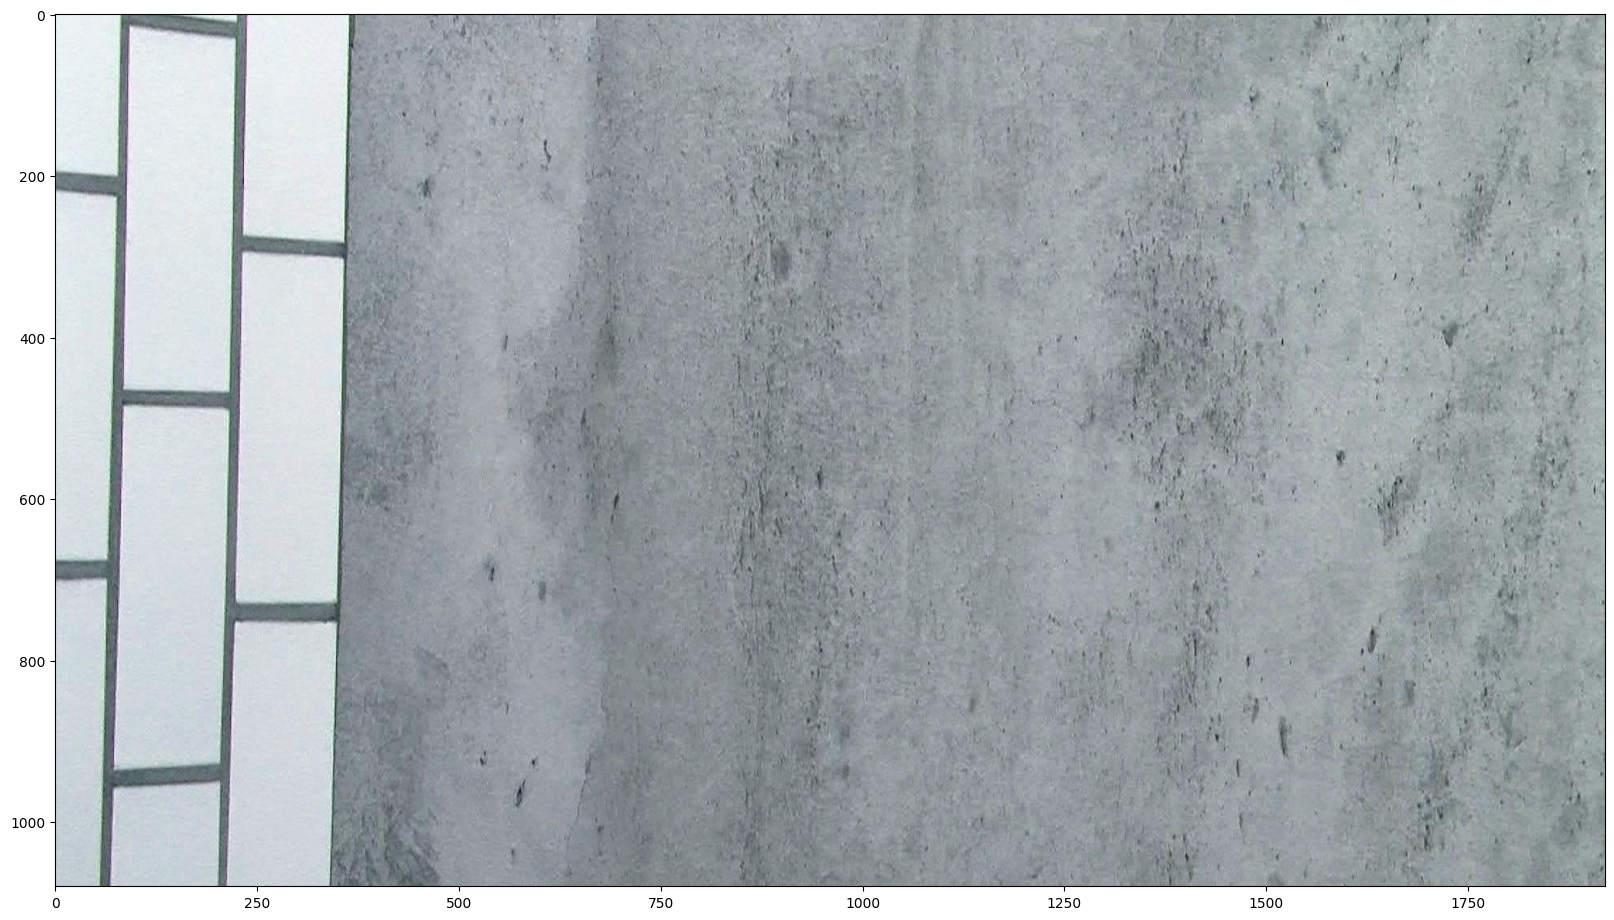

1
[{'label': 'crack', 'labelNum': 0, 'points': [[1242, 424], [1242, 424], [1242, 424], [1242, 424], [1242, 424], [1242, 424], [1242, 424], [1228, 372], [1228, 352], [1230, 340], [1238, 333], [1238, 333], [1238, 333], [1238, 332], [1238, 332], [1238, 332], [1244, 310], [1244, 310], [1244, 310], [1244, 310], [1244, 310], [1244, 310], [1244, 310], [1238, 290], [1238, 264], [1242, 236], [1242, 236], [1242, 218], [1242, 218], [1240, 200], [1242, 172], [1254, 150], [1254, 150], [1260, 136], [1260, 136], [1266, 114], [1272, 96], [1278, 87], [1278, 86], [1278, 86], [1278, 86], [1282, 70], [1282, 70], [1282, 70], [1282, 10], [1282, 9], [1280, 9], [1280, 70], [1276, 86], [1270, 95], [1270, 96], [1270, 96], [1264, 114], [1264, 114], [1258, 136], [1252, 150], [1240, 172], [1240, 172], [1240, 172], [1240, 172], [1240, 172], [1238, 200], [1238, 200], [1238, 200], [1240, 218], [1240, 236], [1236, 264], [1236, 264], [1236, 290], [1236, 290], [1236, 290], [1236, 290], [1242, 310], [1236, 331], [1228, 3

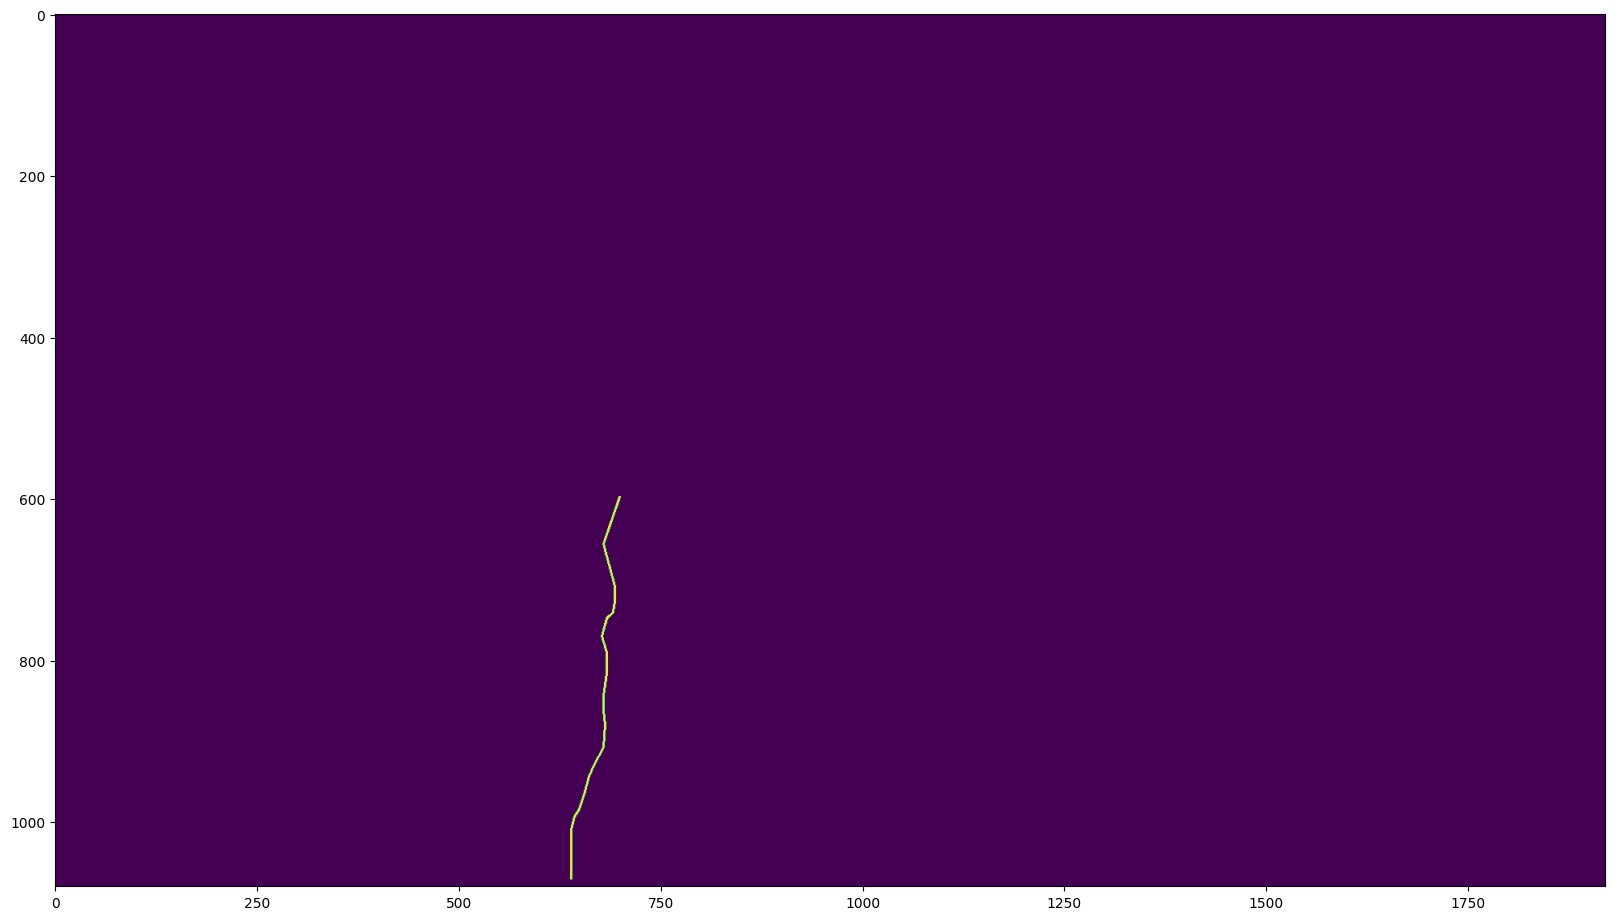

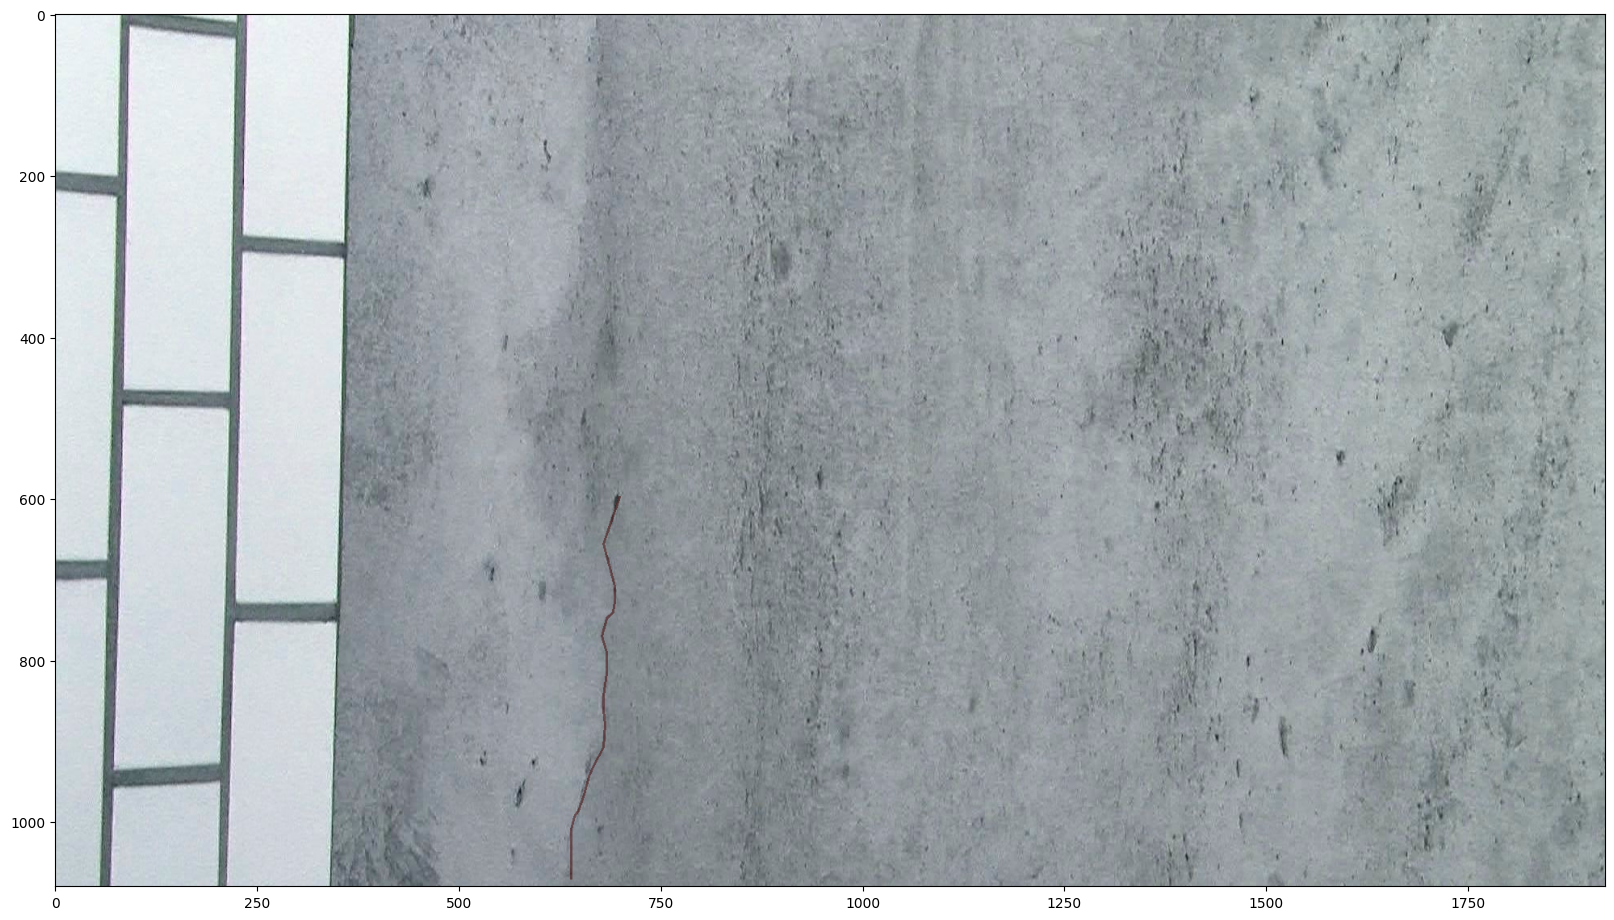

In [44]:
with open(path2label, 'r') as f:
    label = json.load(f)
    

# read image
img = cv2.imread(path2img)
# show image
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()


# show segmentation 

mask   = np.zeros(img.shape[:2], dtype=np.uint8)
print(len(label['image']['annotations']))
print(label['image']['annotations'])
for i in range(len(label['image']['annotations'])):
    points = np.array(label['image']['annotations'][i]['points'])
    points = img.shape[:2][::-1]  - points

    # make polygon using points

    cv2.fillPoly(mask, [points], 255)

    # # make line using points
    # for i in range(len(points)-1):
    #     p1 = points[i]
    #     p2 = points[i+1]
    #     cv2.line(mask, tuple(p1), tuple(p2), 255, 3)

    # for x,y in points:
    #     # print(x,y)
    #     mask[y-1:y+2,x-1:x+2] = 255

plt.figure(figsize=(20,20))
plt.imshow(mask)
plt.show()


# cv2.fillPoly(mask, [points], (255,255,255))

# apply mask on image by changing color of masked area
result = img.copy()
result[mask==0] = img[mask==0]
result[mask!=0] = img[mask!=0] * 0.5 + np.array([155,0,0]) * 0.2

# clip values to 255
result[result>255] = 255

# show result
plt.figure(figsize=(20,20))
plt.imshow(result)
plt.show()

